In [55]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
from src.loading import *
from src.saving import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
def _plot_olr_data(data):
    fig, ax = plt.subplots(figsize=(5, 3),
                           subplot_kw=dict(projection=ccrs.PlateCarree()),
                           constrained_layout=True)

    ax.coastlines(resolution='110m')
    ax.add_feature(cfeature.BORDERS, linestyle='-')

    cmap = plt.cm.plasma
    norm = colors.Normalize(vmin=190, vmax=310)

    c = data.plot.contourf(
        ax=ax, cmap=cmap, norm=norm, levels=50, transform=ccrs.PlateCarree(),
        extend='both',
        cbar_kwargs={
            'orientation': 'horizontal',
            'label': '[W m$^{-2}$]',
            'ticks': np.arange(190, 311, 20),
            'format': '%.0f',
            # make it skinny & centered (shorter than axes width)
            'shrink': 0.65,   # shorter bar (0–1, centered)
            'aspect': 35,     # higher -> skinnier
            'pad': 0.06,      # gap between axes and colorbar (in fraction of axes)
        },
    )

    # Matplotlib-style ticks on spines (optional; keep if you want real ticks)
    ax.set_xticks(np.arange(120, 181, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-10, 31, 5),   crs=ccrs.PlateCarree())
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.xaxis.set_major_formatter(LongitudeFormatter(number_format='.0f', degree_symbol='°'))
    ax.yaxis.set_major_formatter(LatitudeFormatter(number_format='.0f', degree_symbol='°'))
    ax.tick_params(labelsize=9)

    ax.set_extent([125, 175, -5, 25], crs=ccrs.PlateCarree())

    return fig, ax


# CERES Observed OLR

/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  ret

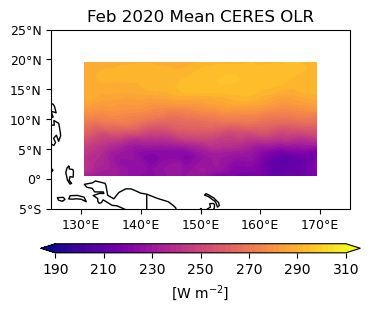

In [56]:
# Load CERES OLR data
#
ceres = load_raw_ceres_data()
ceres_olr = ceres['toa_lw_all_1h']
ceres_olr = ceres_olr.isel(time=ceres_olr.time.dt.hour%3==0).mean('time')
fig, ax = _plot_olr_data(ceres_olr)
ax.set_title('Feb 2020 Mean CERES OLR')
save_figure(fig, 'ceres_olr.pdf')

# gSAM

/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/pedro/miniconda3/envs/scale_interaction_in_gsam/lib/python3.13/site-packages/shapely/predicates.py:878: RuntimeWarning: invalid value encountered in intersects
  ret

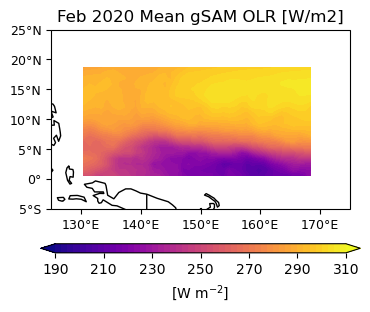

In [57]:
# Load gSAM OLR data
#
gsam_olr = load_gsam_olr_on_1deg().mean('time')
fig, ax = _plot_olr_data(gsam_olr)
ax.set_title('Feb 2020 Mean gSAM OLR [W/m2]')

save_figure(fig, 'gsam_olr.pdf')